# MODEL III : Decision Trees and Random forests

## Data

In [3]:
# Import libraries and modules

# Import the necessary libraries
import sys
import os

# Add the project directory to the sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import everything from lib_import.py, evaluate.py, data_preprocessing.py 
from lib.lib_import import *
from src.data_preprocessing import *
from src.evaluate import *

# Import the data
from data.data_extract import load_data

In [4]:
# Load the data

df_data = load_data()
df_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Preprocessing

### General preprocessing

In [5]:
data = df_data.copy()
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [6]:
# Basic preprocessing : Fix target + remove inutil columns + drop outliers
data = preprocess(data)
data.head(10)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp,13,Married,Exec-managerial,Married,White,Male,0,0,13,United-States,0
2,38,Private,9,Now Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married,Handlers-cleaners,Married,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married,Prof-specialty,Married,Black,Female,0,0,40,Other,0
5,37,Private,14,Married,Exec-managerial,Married,White,Female,0,0,40,United-States,0
6,49,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Other,0
7,52,Self-emp,9,Married,Exec-managerial,Married,White,Male,0,0,45,United-States,1
8,31,Private,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,13,Married,Exec-managerial,Married,White,Male,5178,0,40,United-States,1


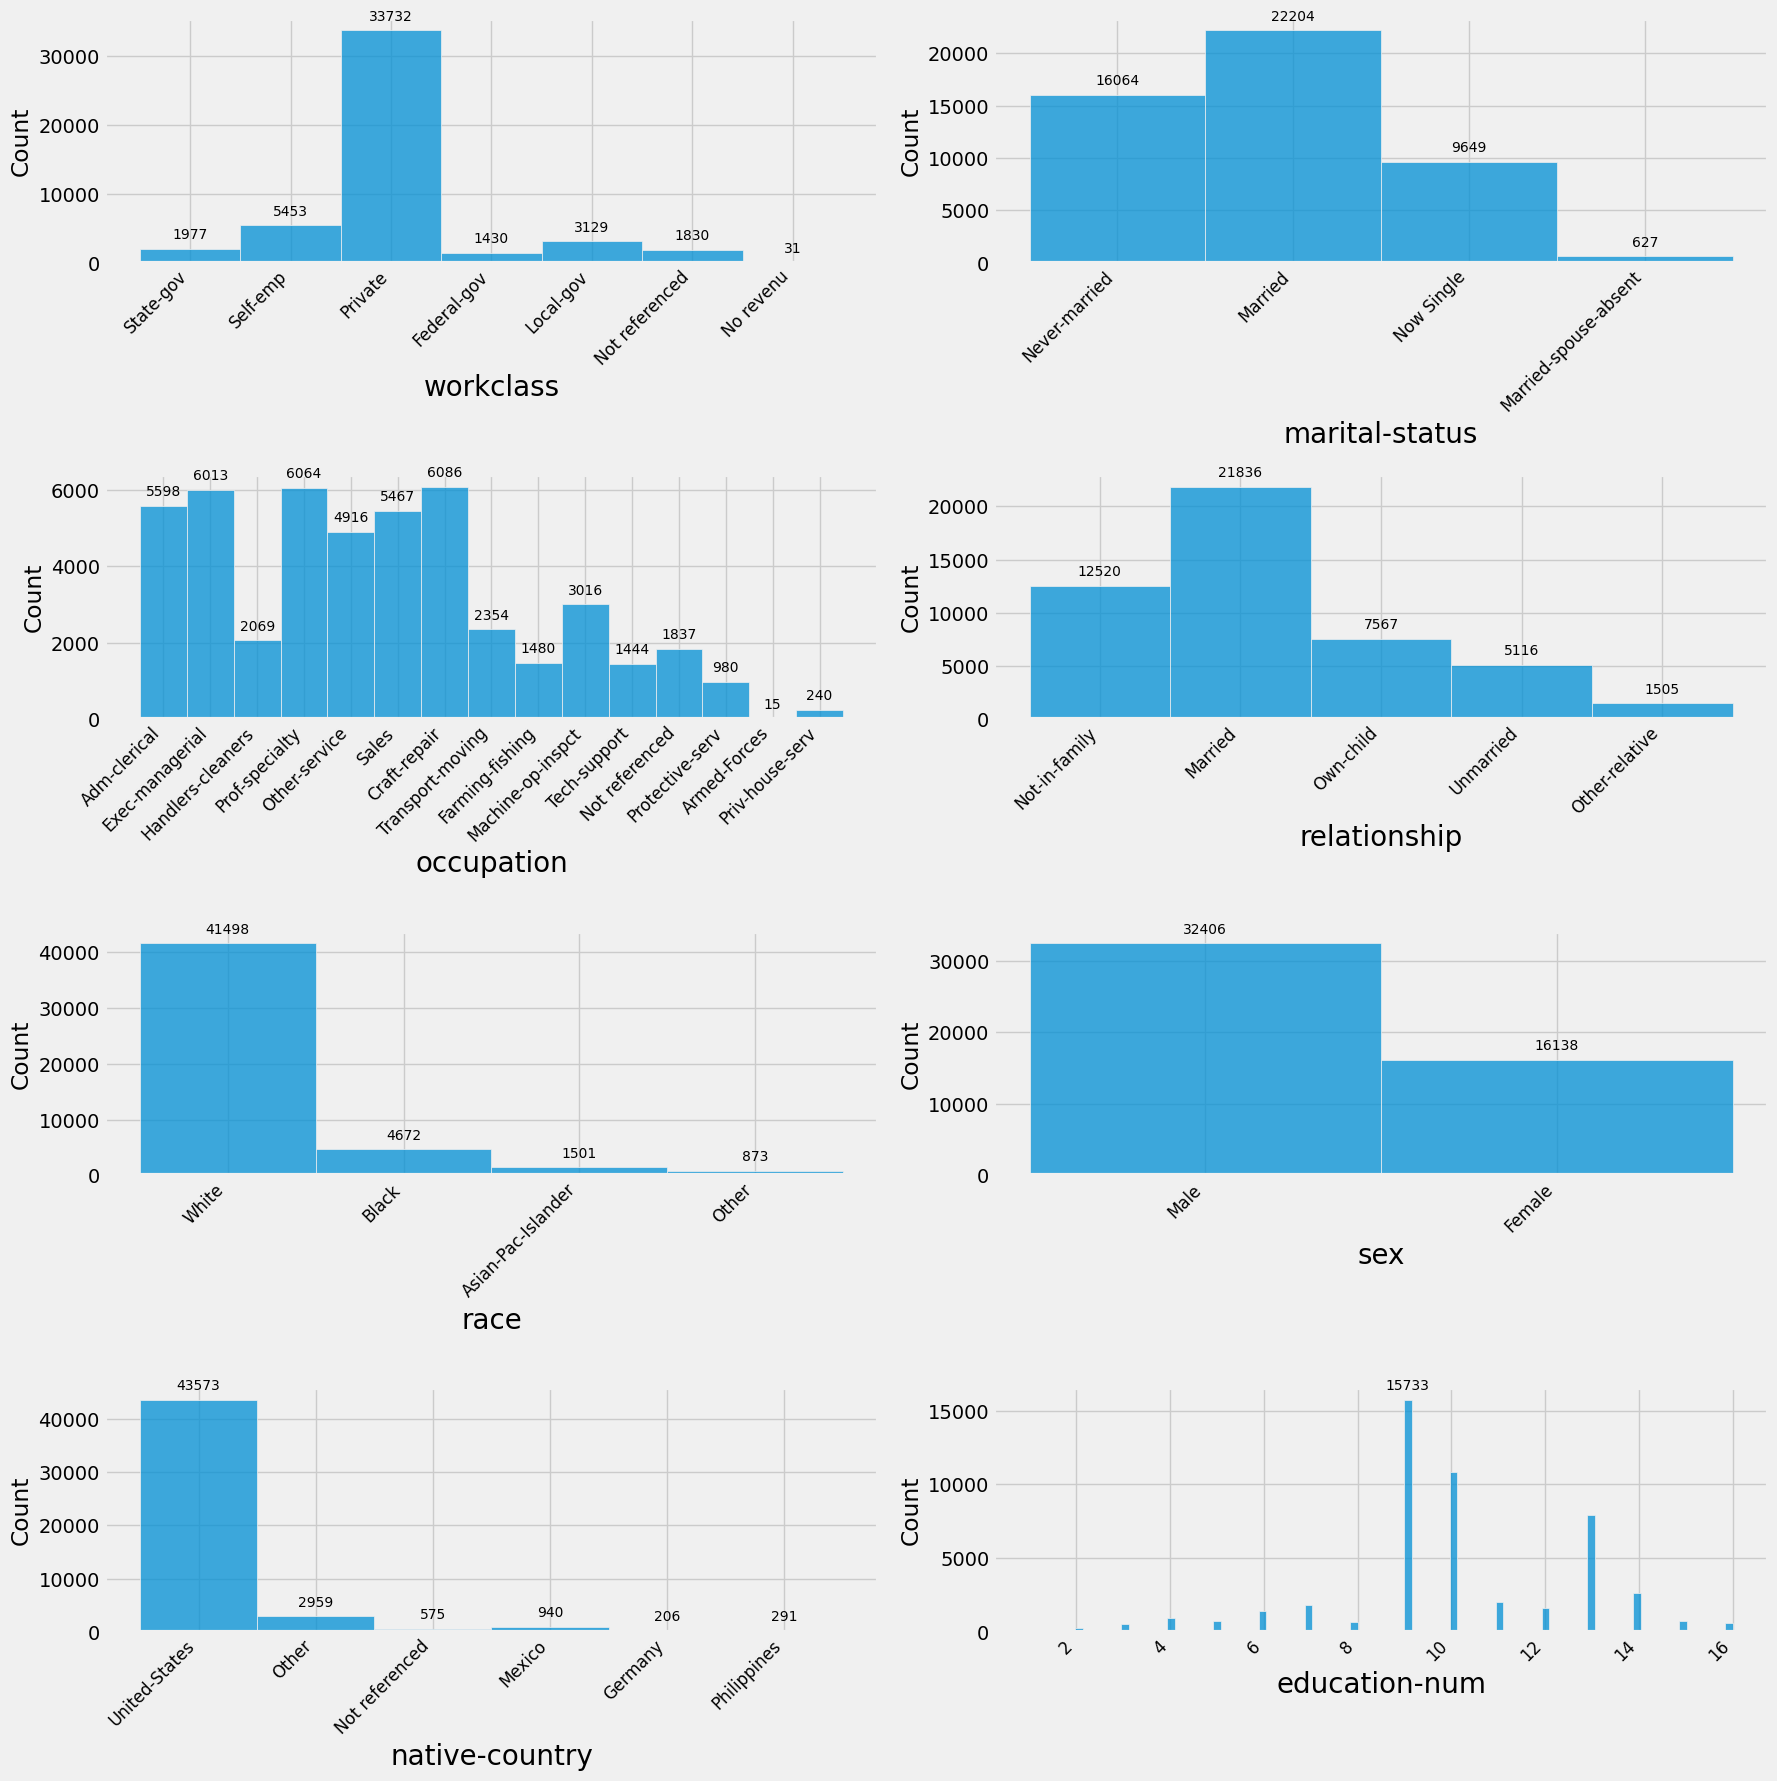

In [7]:
# New data_set

# Data categ
cat_features = get_cat_features(data)

plt.figure(figsize=(18, 18))

for i, feature in enumerate(cat_features):
    if i <= 7:
        ax = plt.subplot(4, 2, i + 1)
        hist = sns.histplot(data[feature], ax=ax)
        
        if i == 7:  # Si c'est le dernier graphique, afficher uniquement la valeur la plus élevée car sinon illisible
            max_height = 0
            max_p = None
            for p in hist.patches:
                height = p.get_height()
                if height > max_height:
                    max_height = height
                    max_p = p
            if max_p is not None:
                ax.annotate(f'{max_height:.0f}',
                            xy=(max_p.get_x() + max_p.get_width() / 2, max_height),
                            xytext=(0, 5),  # Décalage vertical de 5 points
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=10, color='black')
        else:  # Pour les autres graphiques, afficher toutes les valeurs
            for p in hist.patches:
                height = p.get_height()
                ax.annotate(f'{height:.0f}',
                            xy=(p.get_x() + p.get_width() / 2, height),
                            xytext=(0, 5),  # Décalage vertical de 5 points
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=10, color='black')
        
        ax.set_xlabel(feature, fontsize=20)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)

plt.tight_layout()
plt.show()

### Separating dataset - train and test

In [8]:
# Seperate the data into train and test
df_train, df_test = seperate_train_test(data, random_state=42)

In [9]:
df_train.shape, df_test.shape

((38835, 13), (9709, 13))

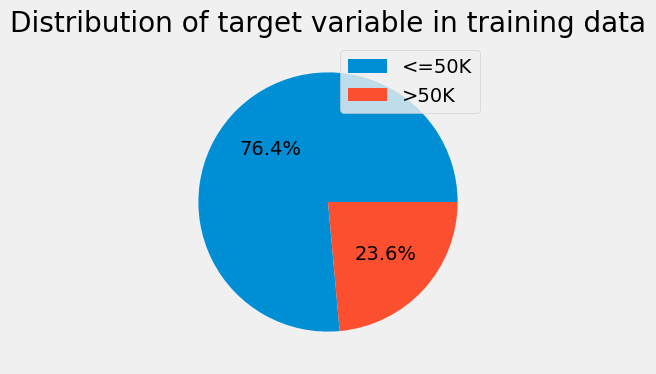

In [10]:
# Check the distribution of target variable in training data
plt.figure(figsize=(8, 4))
plt.pie(df_train['>50K'].value_counts(), autopct='%1.1f%%')
plt.legend(['<=50K', '>50K'], loc='upper right')
plt.title('Distribution of target variable in training data')
plt.show()

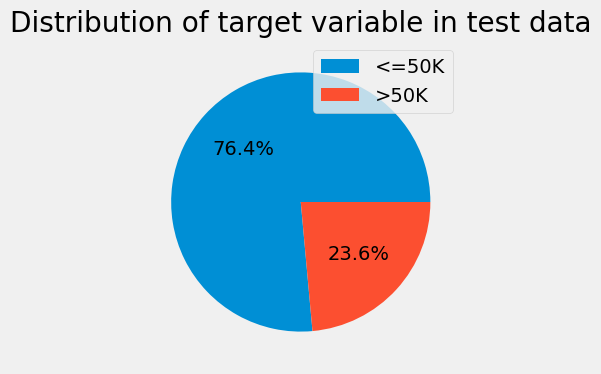

In [11]:
# Check the distribution of target variable in test data
plt.figure(figsize=(8, 4))
plt.pie(df_test['>50K'].value_counts(), autopct='%1.1f%%')
plt.legend(['<=50K', '>50K'], loc='upper right')
plt.title('Distribution of target variable in test data')
plt.show()

### Impute the missing values

In [12]:
# Seperate the categorical and numerical variables
cat_features = get_cat_features(data)
cont_features = get_cont_features(data)

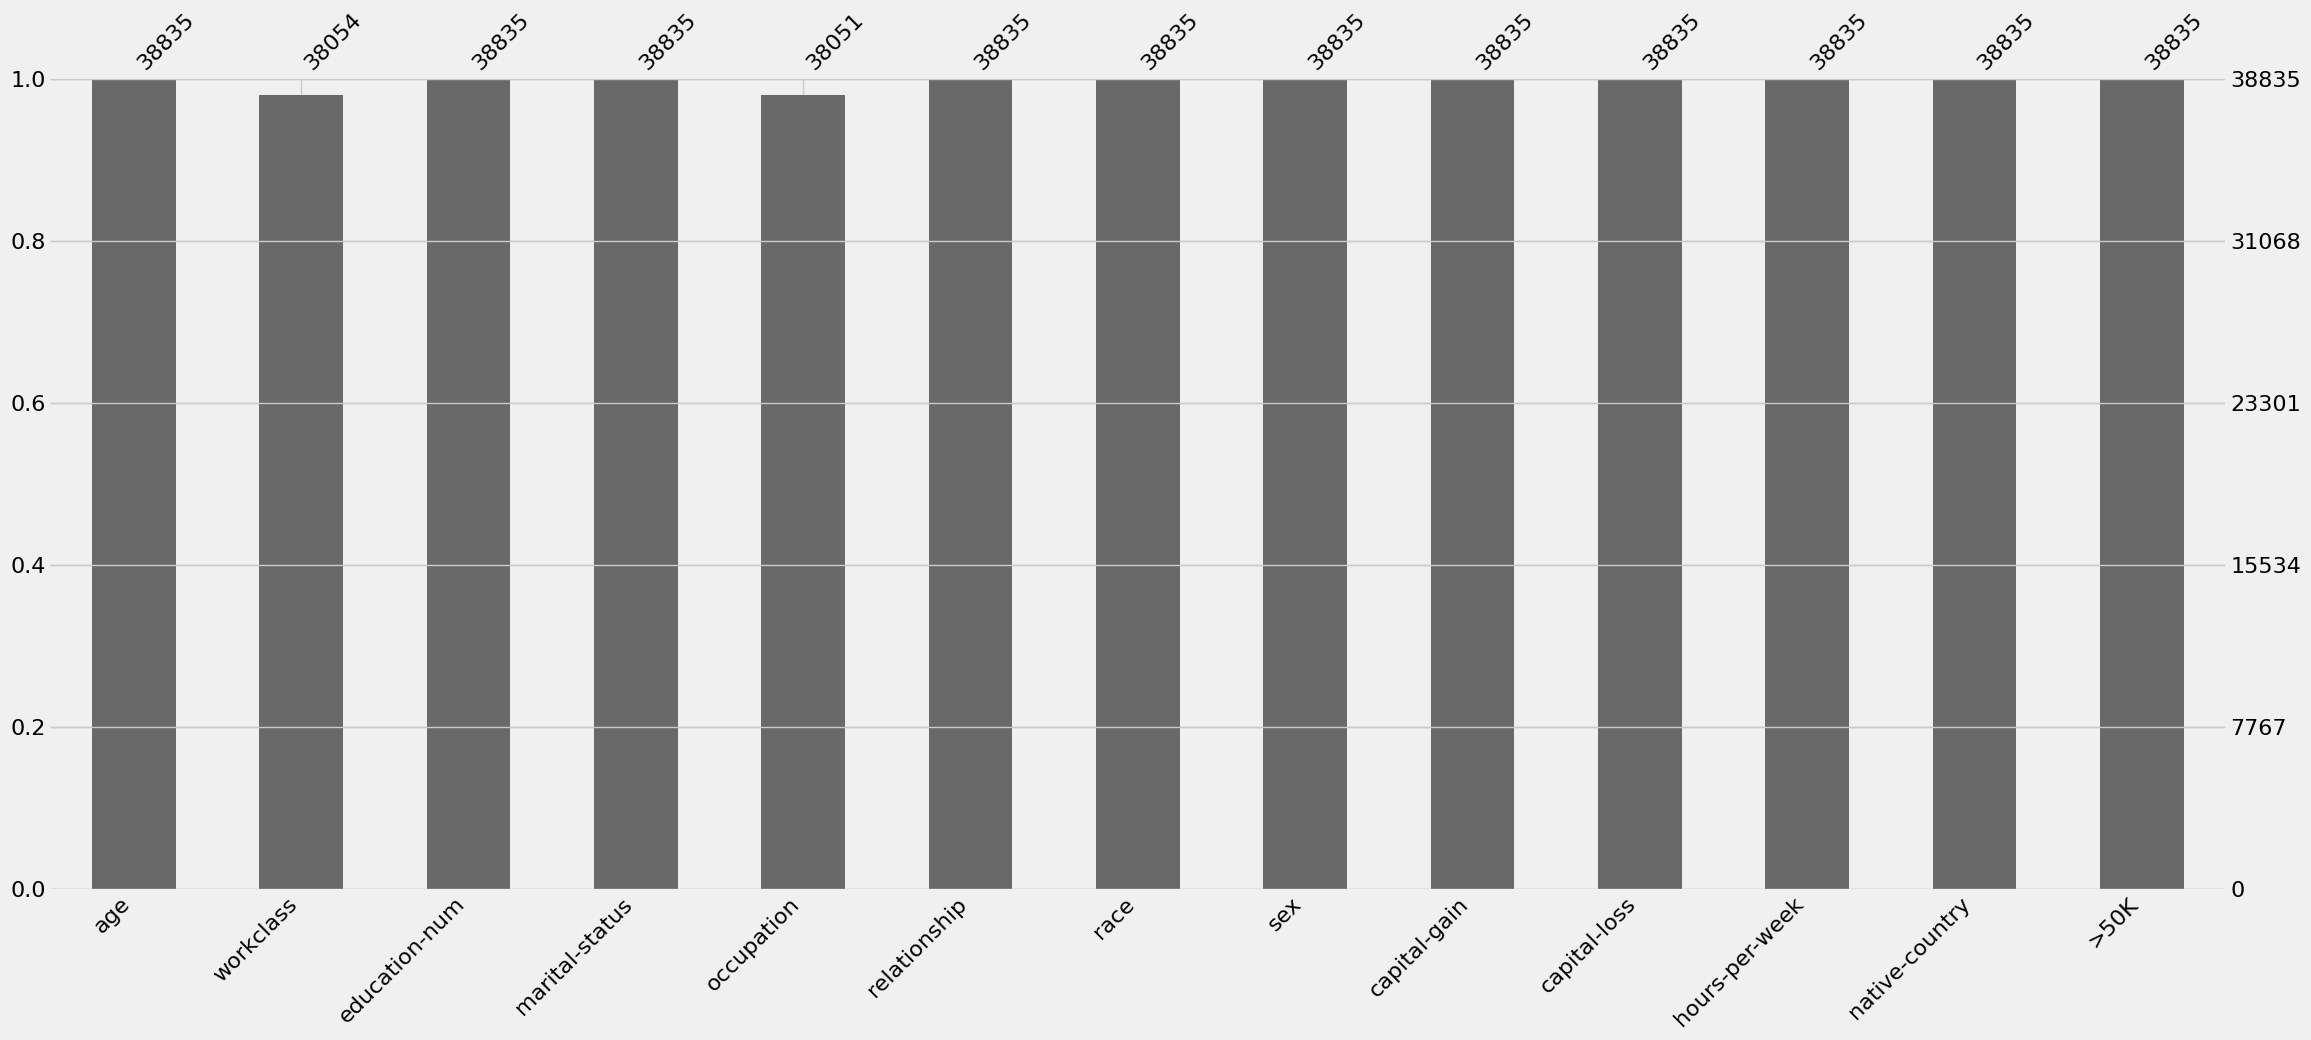

In [13]:
ax = msno.bar(df_train)

In [14]:
# Impute the missing values in the categorical variables
imput_cont = SimpleImputer(missing_values=np.nan, strategy='mean')
imput_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# on n'impute pas pour les variables numériques car aucune n'est manquante. 
# for feature in cont_features :
#     df_train[feature] = imput_cont.fit_transform(df_train[feature].values.reshape(-1,1)).ravel()
#     df_test[feature] = imput_cont.transform(df_test[feature].values.reshape(-1,1)).ravel()
    
for feature in cat_features :
    df_train[feature] = imput_cat.fit_transform(df_train[feature].values.reshape(-1,1)).ravel()
    df_test[feature] = imput_cat.transform(df_test[feature].values.reshape(-1,1)).ravel()

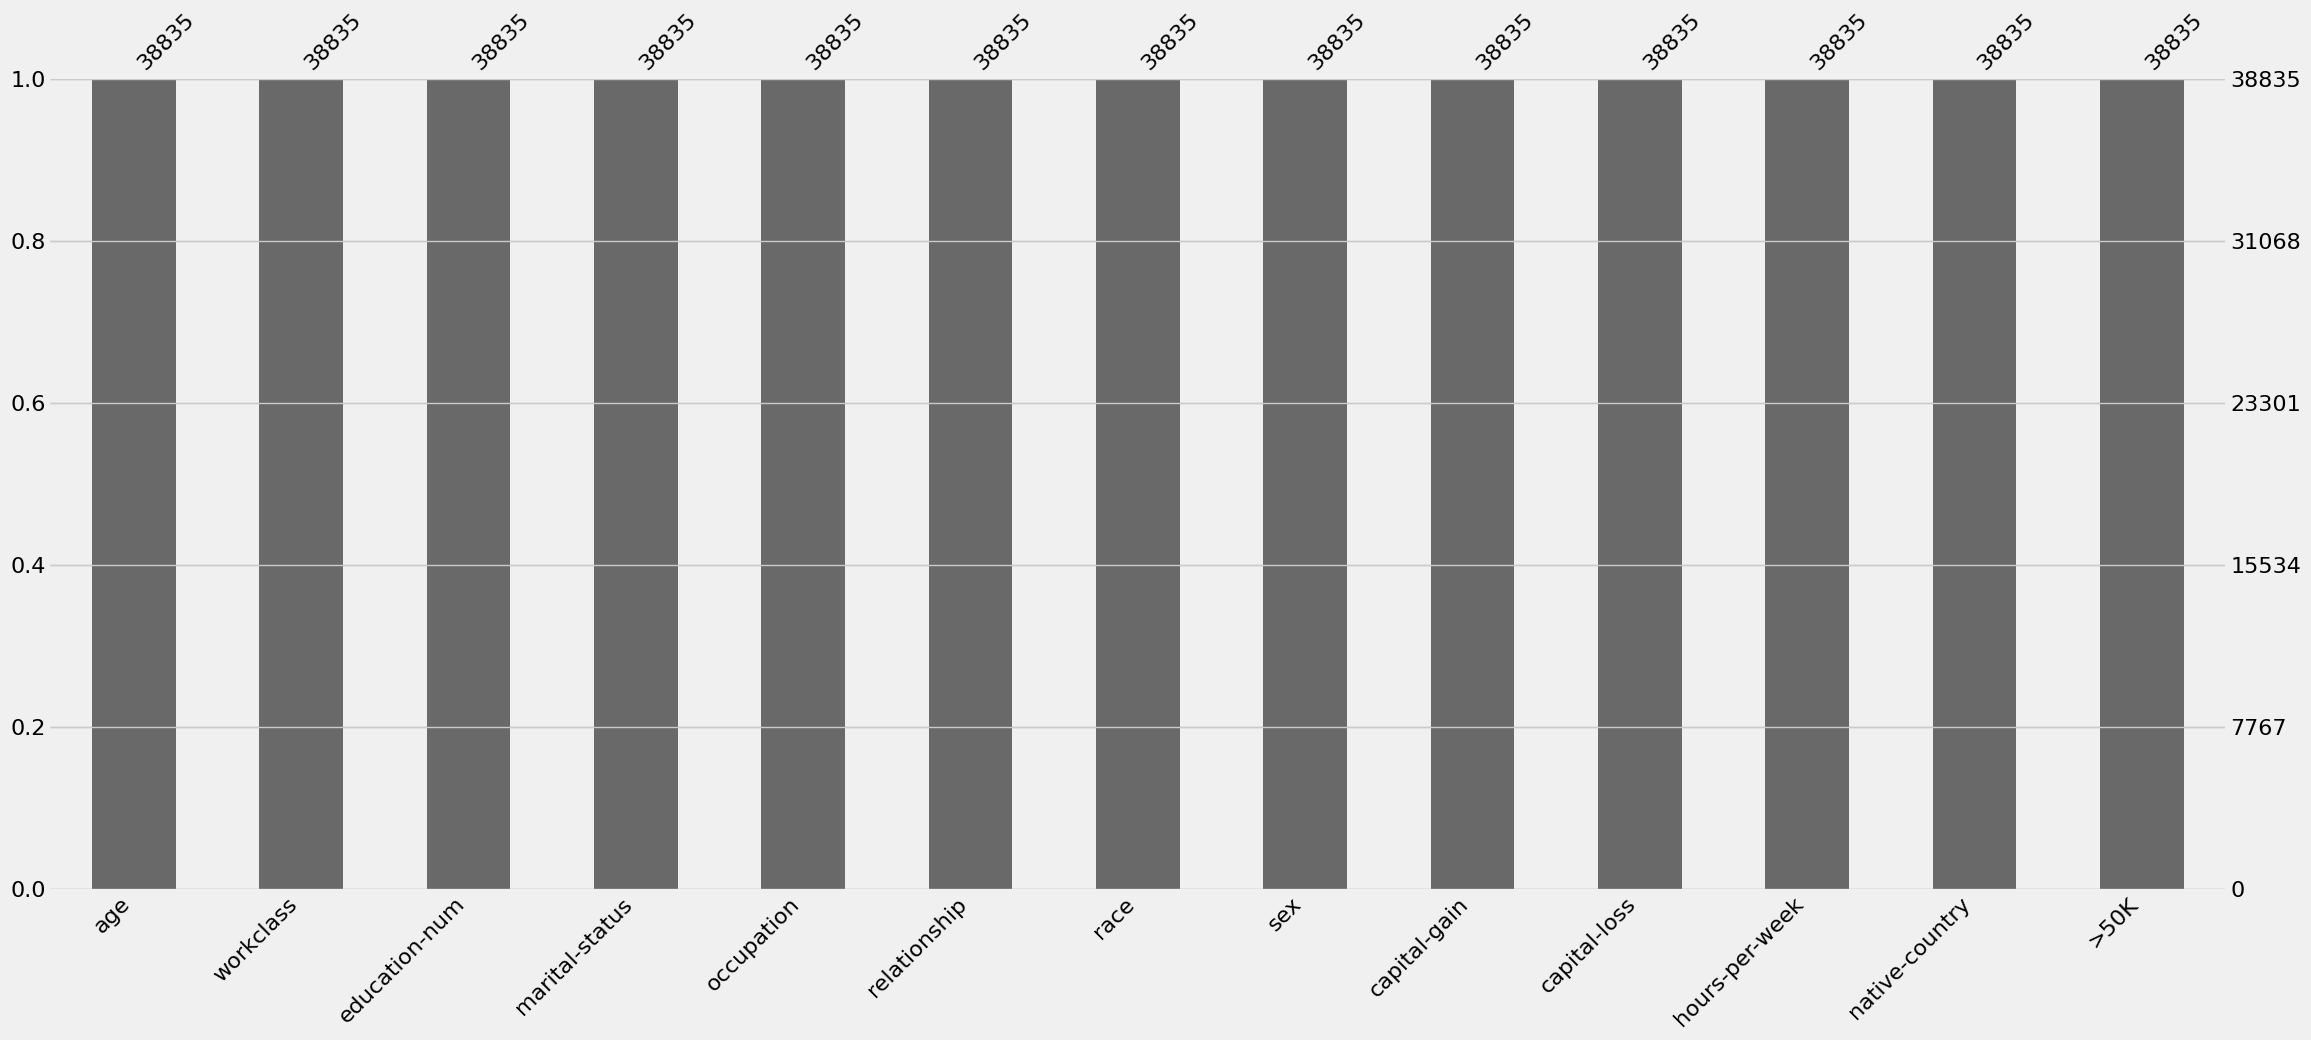

In [15]:
ax = msno.bar(df_train)

## Standardization

### Df_train, Df_test

In [16]:
# Separate the features and target variable
X_train = df_train.drop('>50K', axis=1)
y_train = df_train['>50K']

X_test = df_test.drop('>50K', axis=1)
y_test = df_test['>50K']

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((38835, 12), (38835,), (9709, 12), (9709,))

### Separate Categorical and numerical variables

In [18]:
# Seperate the categorical and numerical variables
cat_features = df_train.select_dtypes('object').columns
cat_features.append(pd.Index(['education-num']))

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'education-num'],
      dtype='object')

In [19]:
cont_features = df_train.select_dtypes('int64').columns
cont_features = cont_features.drop('education-num')
cont_features = cont_features.drop('>50K')
cont_features

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

### Numerical variables

In [20]:
X_train.head(10)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
20628,25,Private,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,40,United-States
34928,32,Self-emp,11,Never-married,Sales,Unmarried,White,Female,0,0,7,United-States
18703,73,Federal-gov,10,Now Single,Tech-support,Not-in-family,White,Female,3273,0,40,United-States
26780,42,Self-emp,10,Now Single,Exec-managerial,Unmarried,White,Male,0,0,90,United-States
38471,35,Self-emp,10,Now Single,Craft-repair,Own-child,White,Male,0,0,40,United-States
12313,68,Private,15,Now Single,Prof-specialty,Unmarried,White,Female,0,0,16,United-States
20808,21,Private,10,Never-married,Sales,Own-child,White,Male,0,0,12,United-States
16671,33,Private,9,Married,Prof-specialty,Married,White,Male,0,0,40,United-States
11649,25,Private,10,Never-married,Sales,Own-child,White,Male,0,0,40,United-States
20774,21,Private,10,Never-married,Sales,Not-in-family,White,Female,0,0,40,United-States


In [21]:
# Standard Scaler

X_train_std, X_test_std = standardize(X_train, X_test, cont_features)

In [22]:
X_train_std.head(10)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
20628,-0.993898,Private,13,Never-married,Prof-specialty,Own-child,White,Female,-0.231956,-0.218153,-0.031402,United-States
34928,-0.484253,Self-emp,11,Never-married,Sales,Unmarried,White,Female,-0.231956,-0.218153,-2.692497,United-States
18703,2.500811,Federal-gov,10,Now Single,Tech-support,Not-in-family,White,Female,1.052857,-0.218153,-0.031402,United-States
26780,0.243811,Self-emp,10,Now Single,Exec-managerial,Unmarried,White,Male,-0.231956,-0.218153,4.000560,United-States
38471,-0.265834,Self-emp,10,Now Single,Craft-repair,Own-child,White,Male,-0.231956,-0.218153,-0.031402,United-States
12313,2.136779,Private,15,Now Single,Prof-specialty,Unmarried,White,Female,-0.231956,-0.218153,-1.966744,United-States
20808,-1.285124,Private,10,Never-married,Sales,Own-child,White,Male,-0.231956,-0.218153,-2.289301,United-States
16671,-0.411447,Private,9,Married,Prof-specialty,Married,White,Male,-0.231956,-0.218153,-0.031402,United-States
11649,-0.993898,Private,10,Never-married,Sales,Own-child,White,Male,-0.231956,-0.218153,-0.031402,United-States
20774,-1.285124,Private,10,Never-married,Sales,Not-in-family,White,Female,-0.231956,-0.218153,-0.031402,United-States


### Categorical variables

In [23]:
X_train_std.head(10)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
20628,-0.993898,Private,13,Never-married,Prof-specialty,Own-child,White,Female,-0.231956,-0.218153,-0.031402,United-States
34928,-0.484253,Self-emp,11,Never-married,Sales,Unmarried,White,Female,-0.231956,-0.218153,-2.692497,United-States
18703,2.500811,Federal-gov,10,Now Single,Tech-support,Not-in-family,White,Female,1.052857,-0.218153,-0.031402,United-States
26780,0.243811,Self-emp,10,Now Single,Exec-managerial,Unmarried,White,Male,-0.231956,-0.218153,4.000560,United-States
38471,-0.265834,Self-emp,10,Now Single,Craft-repair,Own-child,White,Male,-0.231956,-0.218153,-0.031402,United-States
12313,2.136779,Private,15,Now Single,Prof-specialty,Unmarried,White,Female,-0.231956,-0.218153,-1.966744,United-States
20808,-1.285124,Private,10,Never-married,Sales,Own-child,White,Male,-0.231956,-0.218153,-2.289301,United-States
16671,-0.411447,Private,9,Married,Prof-specialty,Married,White,Male,-0.231956,-0.218153,-0.031402,United-States
11649,-0.993898,Private,10,Never-married,Sales,Own-child,White,Male,-0.231956,-0.218153,-0.031402,United-States
20774,-1.285124,Private,10,Never-married,Sales,Not-in-family,White,Female,-0.231956,-0.218153,-0.031402,United-States


In [24]:
# One Hot Encoding

X_train_encoded, X_test_encoded = encode_cat_features_onehot(X_train_std, X_test_std, cat_features)

In [25]:
X_train_encoded.head(10)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_No revenu,workclass_Not referenced,workclass_Private,workclass_Self-emp,workclass_State-gov,marital-status_Married,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Now Single,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Not referenced,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Married,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Germany,native-country_Mexico,native-country_Not referenced,native-country_Other,native-country_Philippines,native-country_United-States
0,-0.993898,13,-0.231956,-0.218153,-0.031402,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.484253,11,-0.231956,-0.218153,-2.692497,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.500811,10,1.052857,-0.218153,-0.031402,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.243811,10,-0.231956,-0.218153,4.000560,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.265834,10,-0.231956,-0.218153,-0.031402,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,2.136779,15,-0.231956,-0.218153,-1.966744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,-1.285124,10,-0.231956,-0.218153,-2.289301,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,-0.411447,9,-0.231956,-0.218153,-0.031402,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,-0.993898,10,-0.231956,-0.218153,-0.031402,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,-1.285124,10,-0.231956,-0.218153,-0.031402,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
X_train_encoded.shape, y_train.shape, X_test_encoded.shape, y_test.shape

((38835, 48), (38835,), (9709, 48), (9709,))

## Modelisation - Decision Trees

### Simple modelisation

On utilise dans la suite : X_train_encoded, y_train et X_test_encoded, y_test.

Decision Tree

Matrice de confusion:
[[6554  868]
 [ 955 1332]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      7422
           1       0.61      0.58      0.59      2287

    accuracy                           0.81      9709
   macro avg       0.74      0.73      0.74      9709
weighted avg       0.81      0.81      0.81      9709
 

Exactitude: 81.223607 



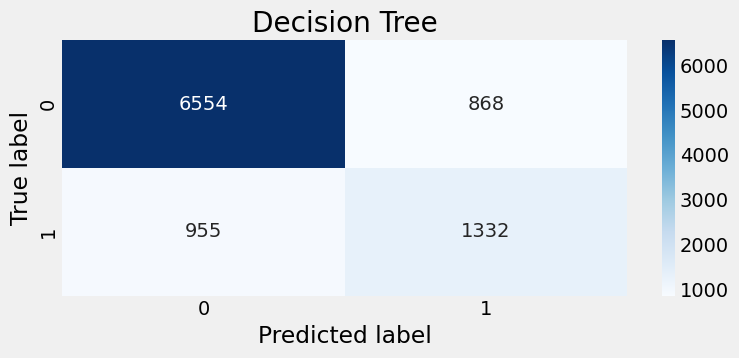

In [27]:
# Decision Tree

decision_tree = DecisionTreeClassifier(criterion = 'gini', random_state=42)
decision_tree.fit(X_train_encoded, y_train)

y_pred = decision_tree.predict(X_test_encoded)

plot_confusion_matrix_sns(y_test, y_pred, "Decision Tree")

In [28]:
# Learnin curve 
N, train_score, val_score = learning_curve(decision_tree, 
                                           X_train_encoded, 
                                           y_train, 
                                           cv=5,
                                           scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10)
                                           )

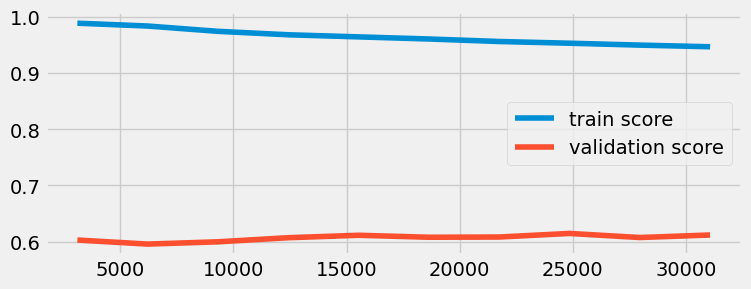

In [29]:
plt.rcParams["figure.figsize"] = (8,3)
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()
plt.show()

### Predictive modeling with oversampling of the minority class

In [30]:
# SMOTE on minority class
smt = SMOTE(random_state=7)

# Do the process
X_train_encoded_up, y_train_up = smt.fit_resample(X_train_encoded, y_train)

  File "c:\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


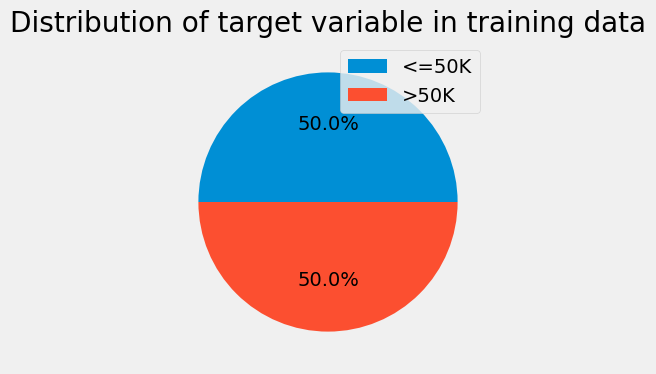

In [31]:
# Check the distribution of target variable in training data

# Concatene dans verif X_train_OHEncoder_up et y_train_up
verif = pd.concat([X_train_encoded_up, y_train_up], axis=1)

plt.figure(figsize=(8, 4))
plt.pie(verif['>50K'].value_counts(), autopct='%1.1f%%')
plt.legend(['<=50K', '>50K'], loc='upper right')
plt.title('Distribution of target variable in training data')
plt.show()

Decision Tree + SMOTE

Matrice de confusion:
[[6394 1028]
 [ 883 1404]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7422
           1       0.58      0.61      0.60      2287

    accuracy                           0.80      9709
   macro avg       0.73      0.74      0.73      9709
weighted avg       0.81      0.80      0.81      9709
 

Exactitude: 80.317231 



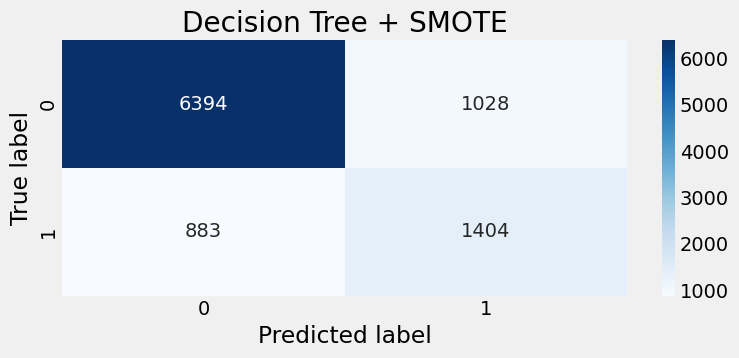

In [32]:
# Decision Tree

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_encoded_up, y_train_up)

y_pred = decision_tree.predict(X_test_encoded)
plot_confusion_matrix_sns(y_test, y_pred, "Decision Tree + SMOTE")

In [33]:
# Learnin curve 
N, train_score, val_score = learning_curve(decision_tree, 
                                           X_train_encoded_up, 
                                           y_train_up, 
                                           cv=5,
                                           scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10)
                                           )

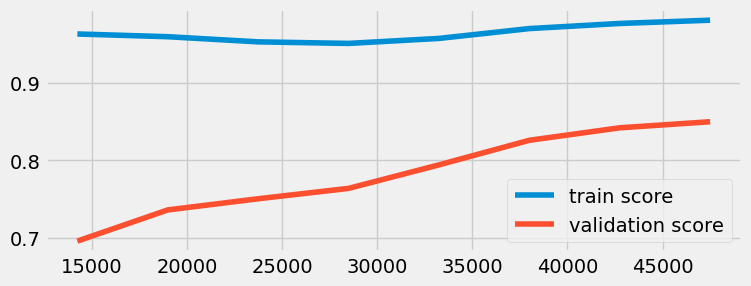

In [34]:
plt.rcParams["figure.figsize"] = (8,3)
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()
plt.show()

On décide donc d'optimiser les hyperparamètres pour améliorer les performances du modèle car il n'est pas satisfaisant. 

### Hyper-parameters optimisation with GridSearch

In [35]:
X_train_encoded_up.shape, y_train_up.shape, X_test_encoded.shape, y_test.shape

((59370, 48), (59370,), (9709, 48), (9709,))

In [36]:
decision_tree

DecisionTreeClassifier(random_state=42)

In [37]:
# # Définir les hyperparamètres pour GridSearchCV
# param_grid = {
#     'max_depth': [None, 10, 20, 30, 40],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [None, 'sqrt', 'log2']
# }

# grid = GridSearchCV(decision_tree, param_grid, verbose=False, n_jobs=1, return_train_score=True, scoring='f1')
# # attention n_jobs=-1 va utiliser tous les CPUs
# grid.fit(X_train_encoded, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='f1', verbose=False)

Résultats pour : 
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
 }

=> {'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [78]:
decision_tree = DecisionTreeClassifier(random_state=42)

# Définir les hyperparamètres pour GridSearchCV
param_grid = {
    'max_depth': [16, 17, 18, 19],
    'min_samples_split': [10, 11, 12, 13],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [None, 'sqrt', 'log2']
}

grid = GridSearchCV(decision_tree, param_grid, verbose=False, n_jobs=1, return_train_score=True, scoring='f1')
# attention n_jobs=-1 va utiliser tous les CPUs
grid.fit(X_train_encoded_up, y_train_up)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [16, 17, 18, 19],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [10, 11, 12, 13]},
             return_train_score=True, scoring='f1', verbose=False)

In [79]:
print("Best parameters found: ", grid.best_params_)

Best parameters found:  {'max_depth': 16, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


Les meilleurs paramètres sont :  {'max_depth': 16, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

In [80]:
best_optim = grid.best_estimator_

In [81]:
best_optim.fit(X_train_encoded_up, y_train_up)

DecisionTreeClassifier(max_depth=16, min_samples_split=10, random_state=42)

In [82]:
train_score = best_optim.score(X_train_encoded_up, y_train_up)
test_score = best_optim.score(X_test_encoded, y_test)
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

Train score: 0.8928583459659761
Test score: 0.8115150890925945


In [83]:
y_pred = best_optim.predict(X_test_encoded)

Decision Tree + SMOTE + GridSearchCV

Matrice de confusion:
[[6109 1313]
 [ 517 1770]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      7422
           1       0.57      0.77      0.66      2287

    accuracy                           0.81      9709
   macro avg       0.75      0.80      0.76      9709
weighted avg       0.84      0.81      0.82      9709
 

Exactitude: 81.151509 



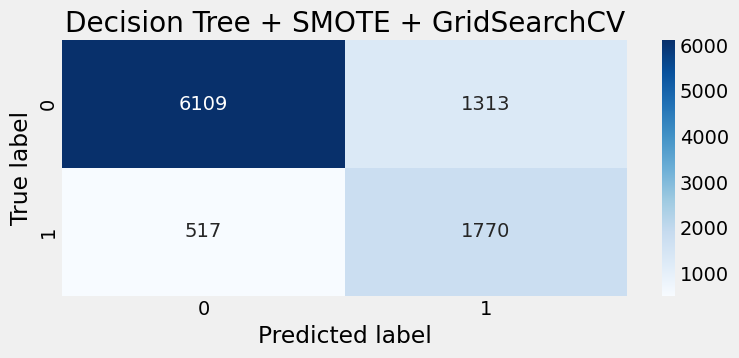

In [84]:
plot_confusion_matrix_sns(y_test, y_pred, 'Decision Tree + SMOTE + GridSearchCV') 

On obtient de meilleurs résultats en optimisant les hyperparamètres.

In [85]:
# Learnin curve 
N, train_score, val_score = learning_curve(best_optim, 
                                           X_train_encoded_up, 
                                           y_train_up, 
                                           cv=5,
                                           scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10)
                                           )

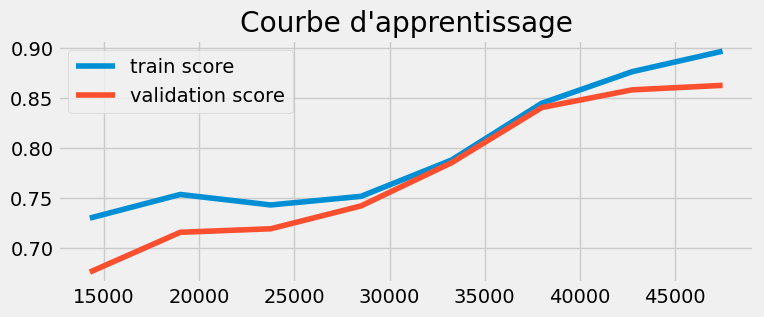

In [86]:
plt.rcParams["figure.figsize"] = (8,3)
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()
plt.title("Courbe d'apprentissage")
plt.show()

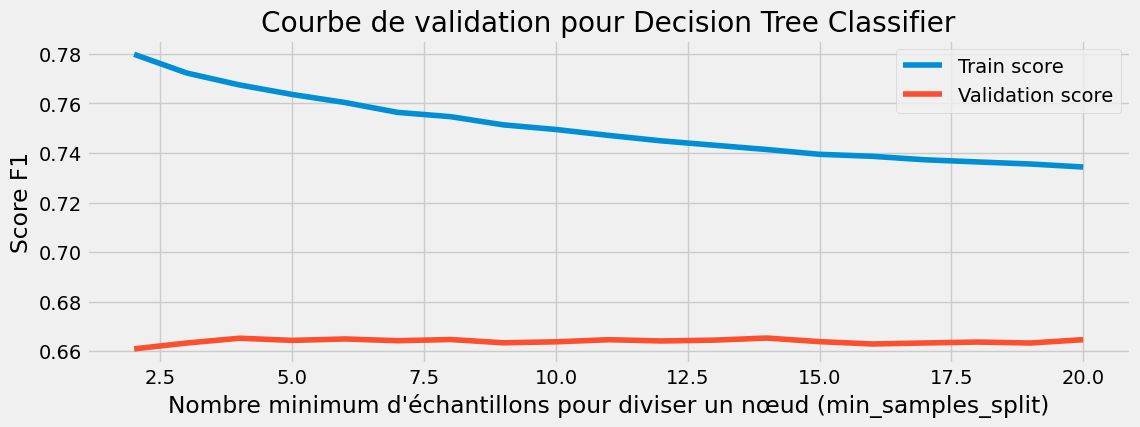

In [87]:
# Calculer les courbes de validation

param_range = np.arange(2, 21)

train_scores, val_scores = validation_curve(
    best_optim,
    X_train_encoded,
    y_train,
    param_name='min_samples_split',
    param_range=param_range,
    cv=5,
    scoring="f1"
)

# Calculer la moyenne et l'écart-type des scores
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

# Tracer les courbes de validation
plt.figure(figsize=(12, 4))
plt.plot(param_range, train_scores_mean, label='Train score')
plt.plot(param_range, val_scores_mean, label='Validation score')
plt.legend()
plt.title("Courbe de validation pour Decision Tree Classifier")
plt.ylabel('Score F1')
plt.xlabel('Nombre minimum d\'échantillons pour diviser un nœud (min_samples_split)')
plt.show()